# Correlation Complexity $\eta$ 
$\eta=\sum_{m=1}^{\infty}(m-1)k_m$  

with  

$k_m=\sum_{\sigma}p(\sigma)K[P_0;P]=\sum_{\sigma_{m-1}}p(\sigma_{m-1}) \sum_{x_{m}}p(x_m | \sigma_{m-1})log(\frac{p(x_m | \sigma_{m-1})}{p(x_m | \sigma'_{m-1})})$  

with $\sigma_{m} = x_1x_2...x_m$ and $\sigma'_{m} = x_2x_3...x_m$

$p(a|b) = \frac{p(a \& b)}{p(b)}$

In [66]:
import json
import numpy as np
from NDSparseTensor import NDSparseTensor
from time import time
from pylab import *

## Read a NDSparseMatrix

In [67]:
frequencies_loaded = {}
text_name = 'Pride and Prejudice'
for m in range(1, 10):
    with open(f'frequencies/{text_name} m{m}.json', 'r', encoding="utf8") as f:
        json_text = f.read()

        frequencies_loaded[m] = NDSparseTensor.fromjson(json_text)

with open(f'frequencies/{text_name} unique symbols.json', 'r', encoding="utf-8") as f:
    unique_symbols = json.load(f)

Total number of symbolsequences recorded, $\texttt{total}$

$P(\sigma_m)=\frac{\texttt{frequency of }\sigma_m}{\texttt{total}}$

In [68]:
total = {}
for m in range(1, 10):
    tot = 0
    for key, value in frequencies_loaded[m].getnonzero():
        tot += value
    total[m] = tot
print(total)

{1: 126221, 2: 126220, 3: 126219, 4: 126218, 5: 126217, 6: 126216, 7: 126215, 8: 126214, 9: 126213}


## Calculate Correlation Information $k_m$

$k_m=\sum_{\sigma}p(\sigma)K[P_0;P]=\sum_{\sigma_{m-1}}p(\sigma_{m-1}) \sum_{x_{m}}p(x_m | \sigma_{m-1})log(\frac{p(x_m | \sigma_{m-1})}{p(x_m | \sigma'_{m-1})})$  

with $\sigma_{m} = x_1x_2...x_m$ and $\sigma'_{m} = x_2x_3...x_m$

$p(a|b) = \frac{p(a \& b)}{p(b)}$

$p(x_m|\sigma_{m-1}) = \frac{p(\sigma_{m-1})}{p(\sigma'_{m-1})}$ with $\sigma_{m} = x_1x_2...x_m$ and $\sigma'_{m} = x_2x_3...x_m$

In [64]:
def calculate_correlation_information(m):
    k = 0

    if m == 1:
        frequencies_loaded[1].normalize()
        n_unique = len(unique_symbols)

        for key, value in frequencies_loaded[m].getnonzero():
            k += value * np.log2(value * n_unique)
        return k

    for i in frequencies_loaded.keys():
        frequencies_loaded[i].normalize()

    for key, value in frequencies_loaded[m].getnonzero():
        sequence_1m  = key
        sequence_1m1 = key[:-1]
        sequence_2m1 = key[1:-1]
        sequence_2m  = key[1:]

        p_1m  = frequencies_loaded[m][sequence_1m]
        p_1m1 = frequencies_loaded[m-1][sequence_1m1]
        p_2m1 = frequencies_loaded[m-2][sequence_2m1] if m > 2 else 1
        p_2m  = frequencies_loaded[m-1][sequence_2m]

        a = p_1m * np.log2(p_1m * p_2m1 / p_1m1 / p_2m)
        k += a
    return k

ks = {}
for m in range(1, 10):
    ks[m] = calculate_correlation_information(m)

print(ks)

{1: 3.57150491743752, 2: 3.7590271521504377, 3: 3.444907078654232, 4: 1.569470730762116, 5: 0.31967207350787474, 6: 0.04732712585178468, 7: 0.008452648831568278, 8: 0.00202814291888391, 9: 0.0005190414982325639}


In [73]:
def correlation_complexity(correlation_information_dict):
    n = 0
    for m, km in correlation_information_dict.items():
        n += (m-1) * km
    return n

n = correlation_complexity(ks)
k_tot = sum([x for x in ks.values()])
print(f'Correlation complexity n={n} (bits)')
print(f'Total correlation information k_tot={k_tot} (bits)')

Correlation complexity n=16.94164265044313 (bits)
Total correlation information k_tot=12.722908911612652 (bits)


Text(0, 0.5, '$k_m$')

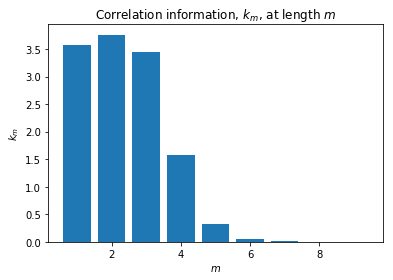

In [65]:
bar(ks.keys(), ks.values())
title('Correlation information, $k_m$, at length $m$')
xlabel('$m$')
ylabel('$k_m$')